# Deterministic Models: Differential Equations

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

print("packages imported")

packages imported


## Learning Goals

* Classify differential equations: order, dimension, separable, linear, autonomous, homogeneous
* Apply analytical methods to find solutions of first order separable equations
* Apply analytical methods to find solutions of second order homogeneous equations with constant coefficients
* Approximate solutions of first order differential equations using numerical methods
* Visualize solutions of differential equations

## Prelecture Readings

* [MATH 360 > Differential Equations > Scalar Equations](https://ubcmath.github.io/MATH360/deterministic/differential/equations.html)
* [Mathematical Python > Differential Equations> First Order Equations](https://patrickwalls.github.io/mathematicalpython/differential-equations/first-order/)

## Clicker Questions

These will be available during class and in the posted notes after class. 

## First Order Separable Equations

Find the general solution of each equation (algebraically) and plot the solution for different initial values $y(0)$.

$y' = \cos(t) y^2$

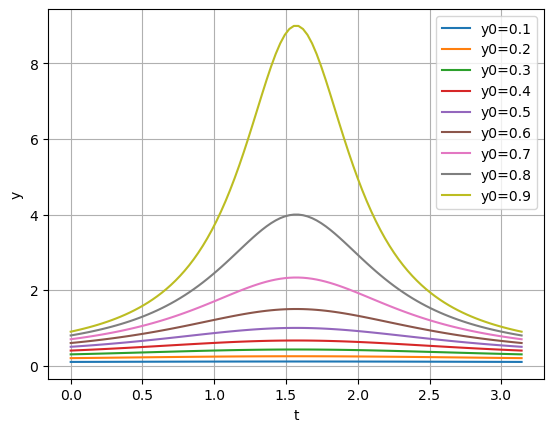

In [32]:
t = np.linspace(0, np.pi, 100)
for y0 in np.arange(0.1, 1, 0.1):
    C = -1/y0 
    y= -1/(np.sin(t) + C)
    plt.plot(t,y, label=f'y0={y0:.1f}')

plt.legend()
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

$y' = y(1 - y)$

/var/folders/8b/8xv60sm9601dqdzch7jd5lsr0000gn/T/ipykernel_83809/1432884149.py:4: RuntimeWarning: divide by zero encountered in divide
  y = C*np.exp(t) / (1 - C*np.exp(t))


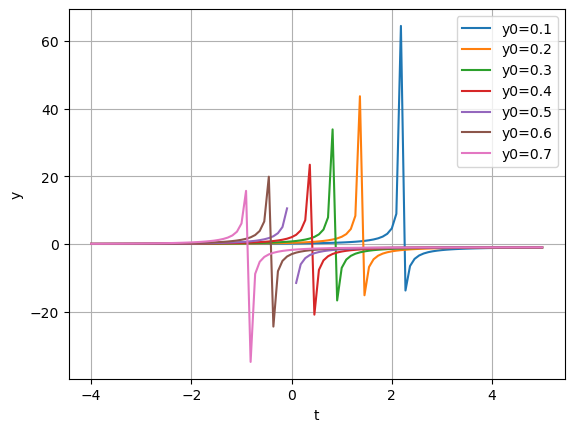

In [44]:
t = np.linspace(-4, 5, 100)
for y0 in np.arange(0.1, 0.8, 0.1):
    C = y0/(1 - y0)
    y = C*np.exp(t) / (1 - C*np.exp(t))
    plt.plot(t, y, label=f'y0={y0:.1f}')

plt.legend()
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

$y' = ty - t$

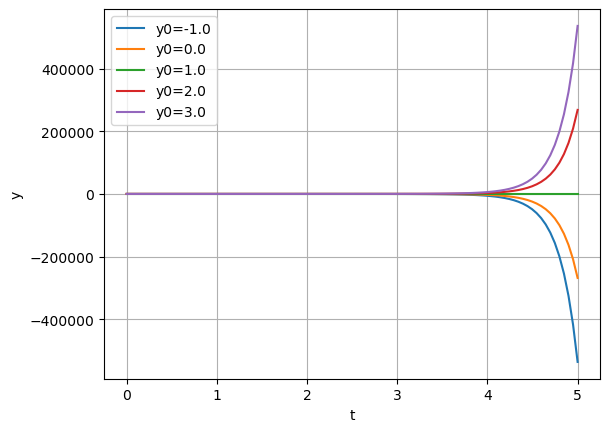

In [54]:
t = np.linspace(0, 5, 100)
for y0 in [-1., 0., 1, 2, 3,]:
    C = y0 - 1
    y = C* np.exp(1/2 * t**2)
    plt.plot(t,y, label=f'y0={y0:.1f}')

plt.legend()
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

$y' + (t + 1)y = t + 1$

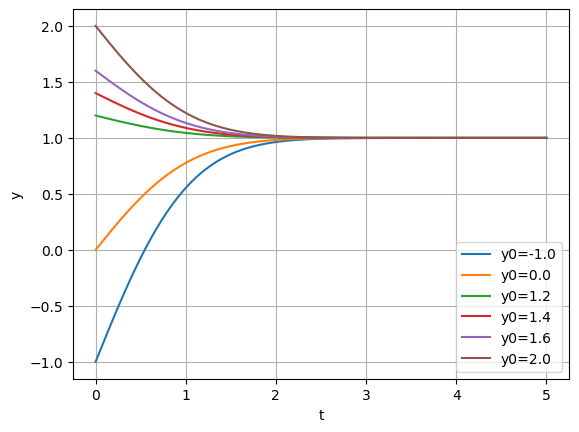

In [60]:
t = np.linspace(0, 5, 1000)
for y0 in [-1., 0., 1.2, 1.4, 1.6, 2.0]:
    C = y0 - 1 
    y = C*np.exp(-(t+t**2/2)) + 1
    plt.plot(t,y, label=f'y0={y0:.1f}')

plt.legend()
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

## Second Order Homogeneous Equations with Constant Coefficients

Find the unique solution of each equation (algebraically) and plot the result.

$y'' + y = 0$, $y(0) = 1$, $y'(0) = 0$

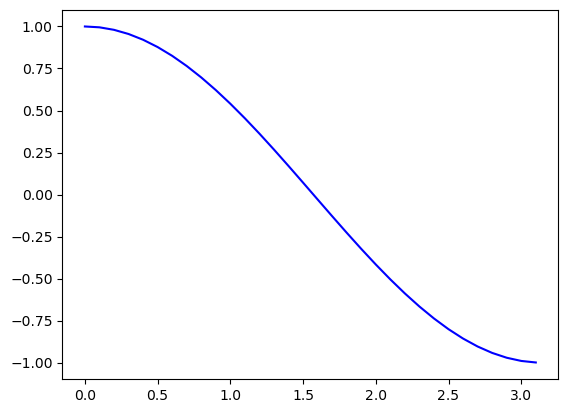

In [61]:
t = np.arange(0, np.pi, 0.1)
y = np.cos(t)
plt.plot(t, y, 'b-')

$y'' - y = 0$, $y(0) = 1$, $y'(0) = 0$

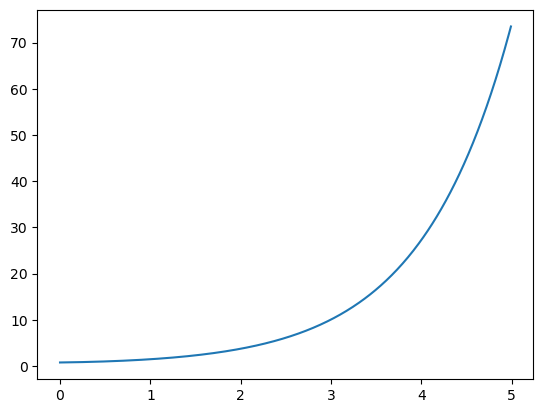

In [21]:
t = np.arange(0,5,0.01)
y = 1/2*(np.exp(t) + 1/2*np.exp(-t))

plt.plot(t,y)

$y'' + 2y' + y = 0$, $y(0) = 1$, $y'(0) = 0$

## Euler's Method

Use Euler's method to approximate the solutions of the following equations and compare to the exact solutions:

$y' = \cos(t) y^2$, $y(0) = 1/2$

In [8]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

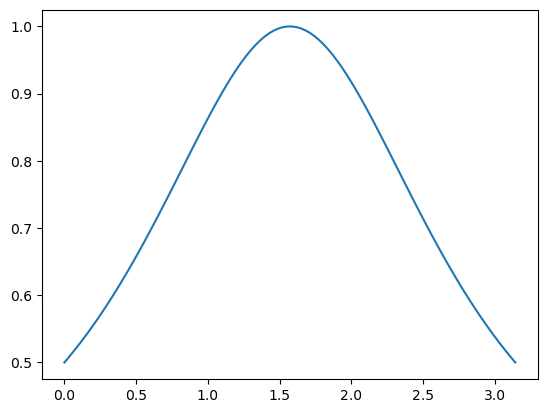

In [9]:
# Exact Solution
tf = np.pi 
t = np.linspace(0, tf, 100)
y = -1/(np.sin(t) -2)

plt.plot(t,y)

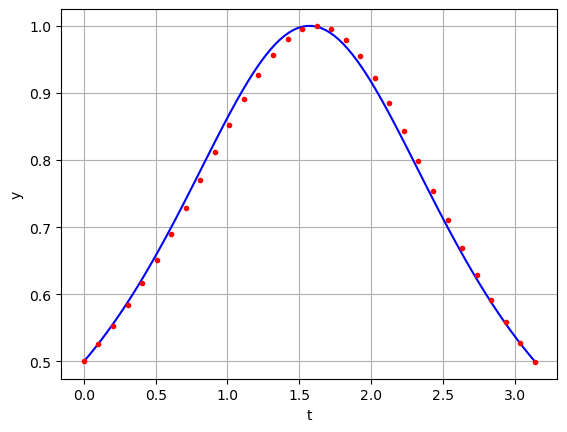

In [16]:
f = lambda t, y: np.cos(t)*y**2 
y0 = 0.5
h = 0.1
t_euler = np.linspace(0, np.pi, int(np.pi/h) + 1)
y_euler = odeEuler(f, t_euler, y0)

plt.plot(t,y, 'b')
plt.plot(t_euler, y_euler, 'r.')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')

plt.show()


$y' = y(1 - y)$, $y(0) = 0.5$

$y' = ty - t$, $y(0) = 2$

$y' + (t + 1)y = t + 1$, $y(0) = 0$

Give an example of a first order differential equation which cannot be solved explicitly with elementary functions. Use Euler's method to approximate solutions of this equation.

### Numerical Solutions with SciPy

Use `scipy.integrate.odeint` to approximate the solutions of the following equations and compare to the exact solutions.

$y' = \cos(t) y^2$, $y(0) = 1/2$

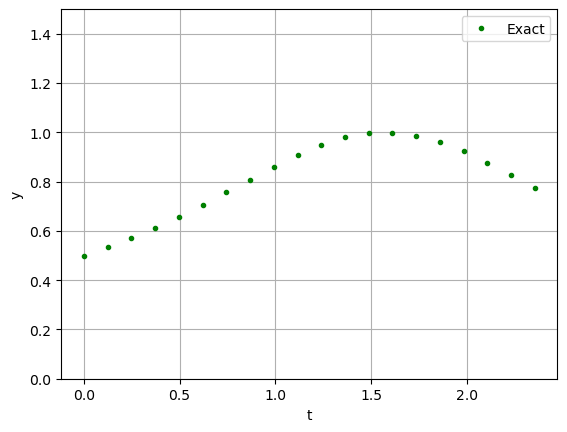

In [31]:
import scipy

# tf = 3*np.pi/4
# t = np.linspace(0, tf, 100)
# y = -1/(np.sin(t)-2)
# plt.plot(t,y, 'b')

f = lambda y, t: np.cos(t)*y**2
y0 = 0.5

T = np.linspace(0, tf, 20) # return 20 points from zero to 2 * pi
Y = scipy.integrate.odeint(f, y0, T)
plt.plot(T, Y, 'g.')
plt.grid(True)
plt.legend(['Exact', 'Numerical'])
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(0, 1.5)
plt.show()

$y' = y(1 - y)$, $y(0) = 0.5$

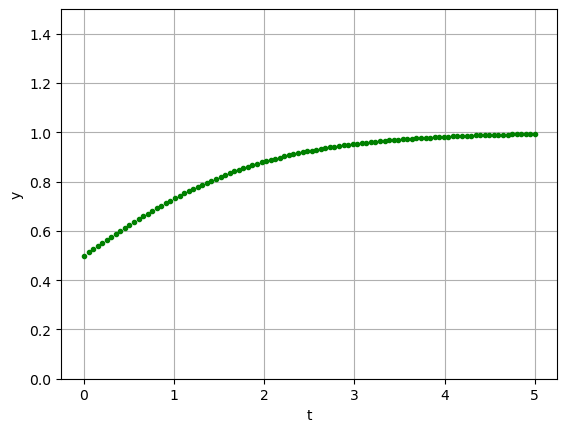

In [65]:
f = lambda y, t: y*(1-y)
y0 = 0.5

t = np.linspace(0, 5, 100)
y = scipy.integrate.odeint(f, y0, t)

plt.plot(t, y, 'g.')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(0, 1.5)
plt.show()

$y' = ty - t$, $y(0) = 2$

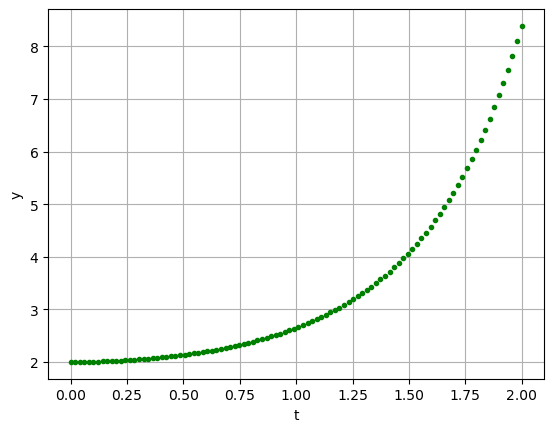

In [67]:
f = lambda y, t: t*y - t
y0 = 2

t = np.linspace(0, 2, 100)
y = scipy.integrate.odeint(f, y0, t)

plt.plot(t, y, 'g.')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

$y' + (t + 1)y = t + 1$, $y(0) = 0$